## Module 7 Assignment 1: Digit Recognizer
# Requirements
1. Conduct your analysis using a cross-validation design.
2. Conduct / refine EDA.
3. Conduct Design of Experiments to evaluate the performance of various neural networks by changing the layers and nodes. 
   Tested neural network structures should be explored within a benchmark experiment, a 2x2 completely crossed design. 
   An example of a completely crossed designed with {2, 5} layers and {10,20} nodes follows.
<img src="image.png">

4. Due to the time required to fit each neural network, we will observe only one trial for each cell in the design. 
5. You will build your models on csv and submit your forecasts for test.csv to Kaggle.com, providing your name and user ID for each experimental trial. 
6. Evaluate goodness of fit metrics on the training and validation sets.
7. Provide a multi-class confusion matrix.
8. Discuss how your models performed.


In [1]:
#!conda create -n tensorflow --yes
#!activate tensorflow
#!pip install --upgrade tensorflow

In [2]:
#!conda activate tensorflow
#!conda deactivate tensorflow --> at the end of the notebook

In [3]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#!conda install --yes xgboost
import xgboost

%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, MinMaxScaler

#stats model
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf

# Model Selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
#!conda install --yes lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score

# Model Accuracy
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, mean_poisson_deviance, mean_squared_error 

# Import librairies
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from datetime import datetime 

import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

import tensorflow as tf
print("You are using TensorFlow version", tf.__version__)
#if len(tf.config.list_physical_devices('GPU')) > 0:
#  print("You have a GPU enabled.")
#else:
#  print("Enable a GPU before running this notebook.")
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential  # initial NN
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, InputLayer, BatchNormalization # construct each layer
from tensorflow.keras.layers import Conv2D # swipe across the image by 1
from tensorflow.keras.layers import MaxPool2D, GlobalMaxPool2D # swipe across by pool size
from tensorflow.keras.layers import Flatten, GlobalAveragePooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau,LearningRateScheduler, TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy, binary_crossentropy, mean_squared_error,sparse_categorical_crossentropy

import pandas as pd
import numpy as np
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline
from tqdm.notebook import trange,tqdm
from IPython.display import Image, display, Markdown, clear_output

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import svm, metrics
from sklearn.decomposition import PCA
from skimage import io

# # tensorflow libraries
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Input,Conv2D,Activation,Dense,Lambda,Flatten,Embedding,PReLU,BatchNormalization,Dropout,MaxPooling2D,GlobalMaxPooling2D,GlobalAveragePooling2D
# from sklearn.model_selection import train_test_split
# from keras.models import Model
# from keras import backend as K

You are using TensorFlow version 2.7.0


In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
train =pd.read_csv('digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [6]:
test = pd.read_csv('digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [7]:
train.isnull().sum().any()

False

In [8]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


<AxesSubplot:xlabel='label', ylabel='Count'>

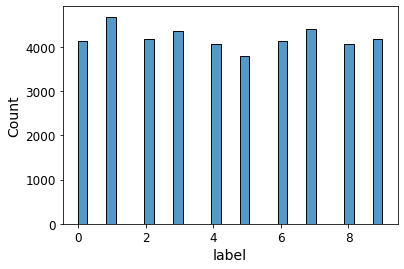

In [9]:
sns.histplot(data=train, x="label")

In [19]:
ntrain = train.shape[0]
y_train = train['label'].values
X_train=train.drop(['label'], axis=1)
X_test=test
print(X_train.shape)
print(X_test.shape)

(42000, 784)
(28000, 784)


In [20]:
# Reshape the data
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)


# Normalize data
X_train = X_train/255.0
X_test = X_test/255.0
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(42000, 28, 28, 1)
(42000,)
(28000, 28, 28, 1)


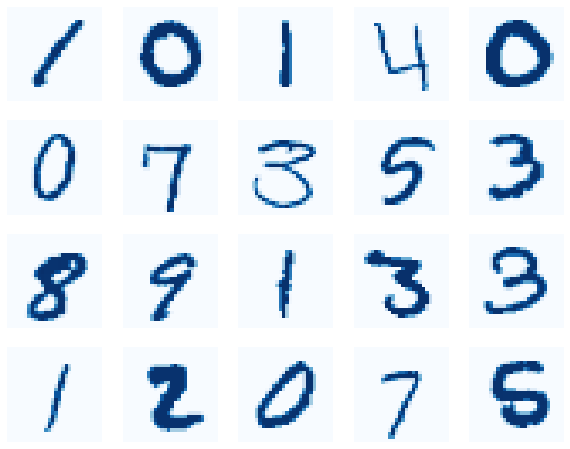

In [22]:
# Visulize data
rows = 4 # defining no. of rows in figure
cols = 5 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(X_train[i].reshape([28,28]), cmap="Blues") 
    plt.axis("off")

In [23]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [24]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(42000, 10)

In [25]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [17]:
# Generate images from dataset
from keras.preprocessing import image 
image_generator = image.ImageDataGenerator()
seed = 42
np.random.seed(seed)

# split training and validation dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size =0.10, random_state = 42)

# Create training and validation batches
training_batch = image_generator.flow(X_train, y_train, batch_size = 64)
validation_batch = image_generator.flow(X_val, y_val, batch_size = 64)
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape) 
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (37800, 28, 28, 1)
X_val shape: (4200, 28, 28, 1)
y_train shape: (37800, 10)
y_val shape: (4200, 10)


In [18]:
# CNN

model = Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation ='relu', input_shape = (28,28,1)),
    layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation ='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.1),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'),
    layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.1),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax'),
])

In [19]:
# Define optimizer 
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, factor=0.5, min_lr=0.00001)

In [21]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [22]:
epochs = 35
batch_size = 90

history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

Epoch 1/35
420/420 [==============================] - 37s 87ms/step - loss: 0.2988 - accuracy: 0.9039 - val_loss: 0.0611 - val_accuracy: 0.9807 - lr: 0.0010
Epoch 2/35
420/420 [==============================] - 39s 93ms/step - loss: 0.0919 - accuracy: 0.9719 - val_loss: 0.0444 - val_accuracy: 0.9881 - lr: 0.0010
Epoch 3/35
420/420 [==============================] - 42s 99ms/step - loss: 0.0629 - accuracy: 0.9808 - val_loss: 0.0503 - val_accuracy: 0.9864 - lr: 0.0010
Epoch 4/35
420/420 [==============================] - 41s 97ms/step - loss: 0.0519 - accuracy: 0.9840 - val_loss: 0.0309 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 5/35
420/420 [==============================] - 42s 101ms/step - loss: 0.0438 - accuracy: 0.9867 - val_loss: 0.0349 - val_accuracy: 0.9893 - lr: 0.0010
Epoch 6/35
420/420 [==============================] - 42s 100ms/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0343 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 7/35
420/420 [==============================] - 43

<AxesSubplot:>

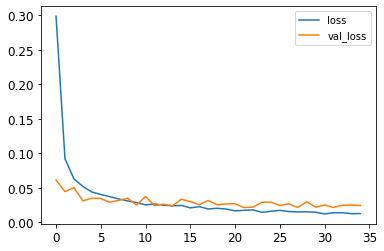

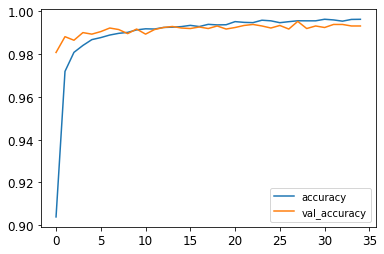

In [23]:
# Plot the loss and val_loss along with accuracy ans val_accuracy

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

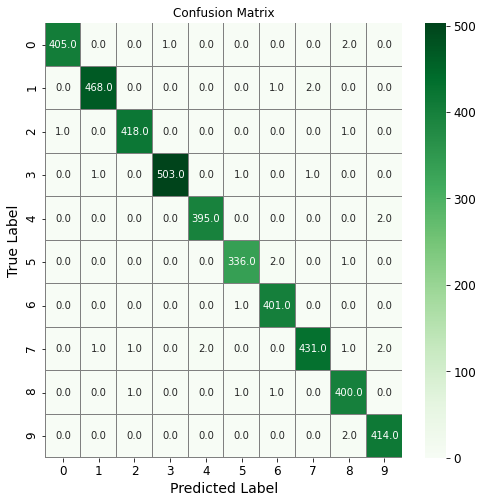

In [24]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [26]:
predictions = model.predict(X_test, batch_size=64)
image_id = range(1, predictions.shape[0] +1)
pred = [np.argmax(i) for i in predictions]
submission = pd.DataFrame({'ImageId': image_id, 'Label': pred})
submission.to_csv('digit_tf_sandeep.csv', index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


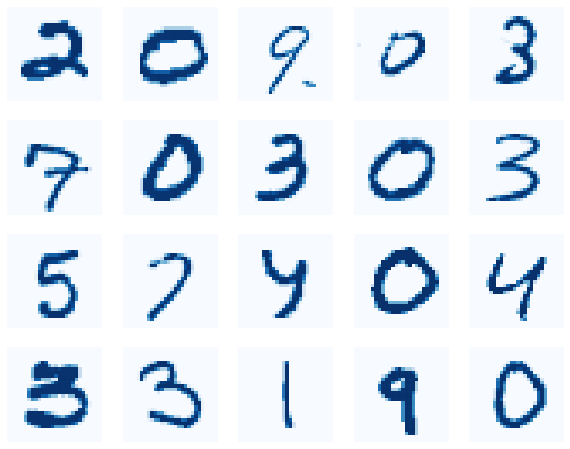

In [27]:
# Visulize data
rows = 4 # defining no. of rows in figure
cols = 5 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(X_test[i].reshape([28,28]), cmap="Blues") 
    plt.axis("off")